In [1]:
import pandas as pd
import gensim
from gensim import corpora
from pprint import pprint
import spacy
import re     
# Plotting tools
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
import pickle
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from Preprocess import Preprocess
from Viz import Viz
from LDA import LDA

[nltk_data] Downloading package punkt to /Users/shruti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/shruti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/shruti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/shruti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/shruti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/shruti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/shruti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/shruti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 1. 2014-2015

In [13]:
f1 = 'Raw_data/Awards1415.csv'

In [14]:
pd.read_csv(f1, encoding ='latin1')

,DocID,AwardNumber,Title,NSFOrganization,Program(s),StartDate,LastAmendmentDate,PrincipalInvestigator,State,Organization,...,OrganizationStreet,OrganizationCity,OrganizationState,OrganizationZip,OrganizationPhone,NSFDirectorate,ProgramElementCode(s),ProgramReferenceCode(s),ARRAAmount,Abstract
0,0,1439052,XPS: FULL: DSD: Collaborative Research: Rapid ...,CCF,Exploiting Parallel&Scalabilty,8/1/14,8/5/14,Jack Dongarra,TN,University of Tennessee Knoxville,...,1331 CIR PARK DR,Knoxville,TN,379163801,8.659743e+09,CSE,8283,9150,$0.00,The impact of Big Data is all around us and is...
1,1,1439007,XPS: FULL: DSD: Collaborative Research: Rapid ...,CCF,Exploiting Parallel&Scalabilty,8/1/14,8/5/14,Geoffrey Fox,IN,Indiana University,...,509 E 3RD ST,Bloomington,IN,474013654,3.172783e+09,CSE,8283,NaN,$0.00,The impact of Big Data is all around us and is...
2,2,1439005,XPS: FULL: DSD: Collaborative Research: Rapid ...,CCF,Exploiting Parallel&Scalabilty,8/1/14,8/5/14,Andrew Ng,CA,Stanford University,...,450 Jane Stanford Way,Stanford,CA,943052004,6.507232e+09,CSE,8283,NaN,$0.00,The impact of Big Data is all around us and is...
3,3,1420897,RI: Small: Dynamic Attractor Computing: A Nove...,IIS,Robust Intelligence,10/1/14,8/18/14,Dean Buonomano,CA,University of California-Los Angeles,...,10889 Wilshire Boulevard,LOS ANGELES,CA,900951406,3.107940e+09,CSE,7495,"7495, 7923, 8089",$0.00,Harnessing the brain's computational strategie...
4,4,1451177,CAREER: Machine Learning Theory with Connectio...,CCF,Algorithmic Foundations,6/1/14,9/12/14,Maria-Florina Balcan,PA,Carnegie-Mellon University,...,5000 Forbes Avenue,PITTSBURGH,PA,152133815,4.122689e+09,CSE,7796,"1045, 9218",$0.00,"Over the years, Machine Learning has become a ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,437,1443133,Spectral Algorithms: From Theory to Practice,CCF,SPECIAL PROJECTS - CCF,9/1/14,5/2/14,Richard Karp,CA,University of California-Berkeley,...,Sponsored Projects Office,BERKELEY,CA,947101749,5.106434e+09,CSE,2878,"7796, 7926",$0.00,"The workshop on ""Taking Spectral Algorithms fr..."
438,438,1451081,BRAIN EAGER: Discovery and characterization of...,DBI,"ADVANCES IN BIO INFORMATICS, Activation",9/1/14,8/18/14,Carey Priebe,MD,Johns Hopkins University,...,1101 E 33rd St,Baltimore,MD,212182686,4.439972e+09,BIO,"1165, 7713","7916, 8091",$0.00,Johns Hopkins University is awarded a grant fo...
439,439,1409612,Computer Science meets Anthropology: A novel a...,SMA,SPRF-IBSS,8/1/14,5/9/14,Kevin Hatala,DC,George Washington University,...,1922 F Street NW,Washington,DC,200520086,2.029941e+09,SBE,8209,NaN,$0.00,Bipedal locomotion is a unique and fundamental...
440,440,1345813,SBIR Phase I: Autonomous Integration of EMR In...,IIP,SMALL BUSINESS PHASE I,1/1/14,11/27/13,Anil Sethi,CA,Gliimpse LLC,...,645 Harrison St,San Francisco,CA,941070000,4.105992e+09,ENG,5371,"5371, 8018, 8032, 8038, 8039, 8042",$0.00,This Small Business Innovation Research (SBIR)...


['project', 'research', 'datum', 'use', 'learn', 'develop', 'model', 'new', 'student', 'application', 'algorithm', 'machine', 'provide', 'method', 'include', 'problem', 'science', 'information', 'technology', 'network', 'human', 'design', 'tool', 'work', 'analysis', 'technique', 'computational', 'study', 'approach', 'support', 'user', 'result', 'speech', 'development', 'improve', 'computer', 'advance', 'learning', 'field', 'make', 'image', 'language', 'set', 'propose', 'large', 'software', 'area', 'enable', 'program', 'process']


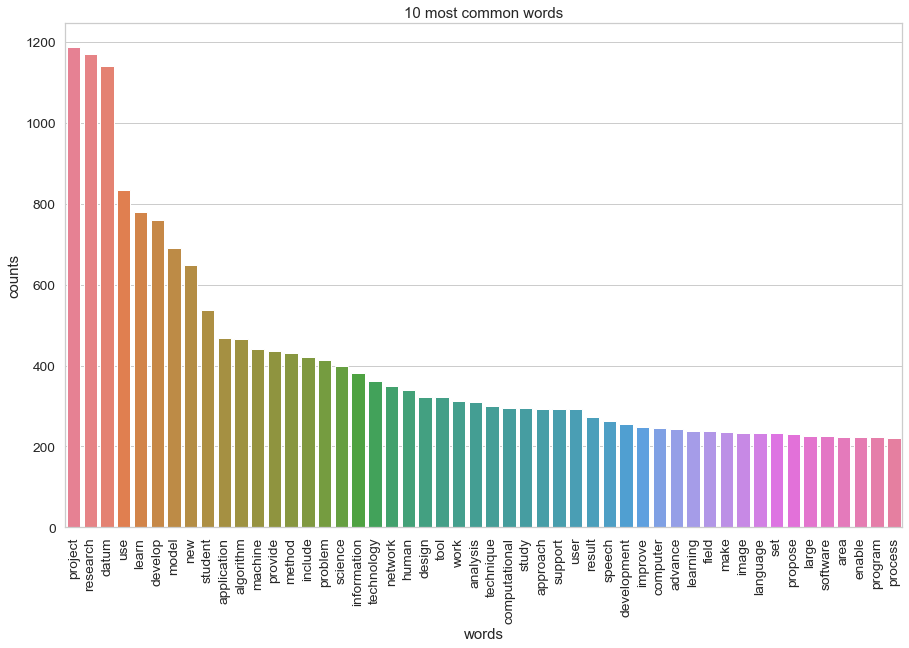

In [15]:
p1= Preprocess(f1)
lem1 = p1.clean_lemmatize(True, 50)

In [17]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
custom_stop = ['project', 'research', 'datum', 'use', 'learn', 'develop', 'model', 'new', 'student', 'application', 
              'algorithm', 'machine', 'provide', 'method', 'include', 'problem', 'science', 'information', 
              'technology', 'work', 'design', 'tool', 'analysis', 'technique', 'study', 'approach', 'support', 'also', 
              'result', 'development', 'improve', 'advance', 'learning', 'field', 'make', 'propose', 'area', 'enable', 
               'program', 'process', 'large', 'system', 'well', 'many']

stop_words = stop_words + custom_stop
id_1, corpus1, stop1 = p1.create_corpus(lem1, stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shruti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
file = open('Pickled_Data/1415_data.pkl','wb')
pickle.dump(id_1, file)
pickle.dump(corpus1, file)
pickle.dump(stop1, file)

# 2. 2015-2016 

In [20]:
f1 = "Raw_data/Awards1516.csv"
p1= Preprocess(f1)
lem1 = p1.clean_lemmatize(False, 50)

In [21]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
custom_stop = ['project', 'research', 'datum', 'use', 'learn', 'develop', 'model', 'new', 'student', 'application', 
              'algorithm', 'machine', 'provide', 'method', 'include', 'problem', 'science', 'information', 
              'technology', 'work', 'design', 'tool', 'analysis', 'technique', 'study', 'approach', 'support', 'also', 
              'result', 'development', 'improve', 'advance', 'learning', 'field', 'make', 'propose', 'area', 'enable', 
               'program', 'process', 'large', 'system', 'well', 'many']
stop_words = stop_words + custom_stop
id_1, corpus1, stop1 = p1.create_corpus(lem1, stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shruti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
file = open('Pickled_Data/1516_data.pkl','wb')
pickle.dump(id_1, file)
pickle.dump(corpus1, file)
pickle.dump(stop1, file)

# 3. 2016-2017 Corpus

In [23]:
f1 = 'Raw_Data/Awards1617.csv'
p1= Preprocess(f1)
lem1 = p1.clean_lemmatize(False, 50)

In [24]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
custom_stop = ['project', 'research', 'datum', 'use', 'learn', 'develop', 'model', 'new', 'student', 'application', 
              'algorithm', 'machine', 'provide', 'method', 'include', 'problem', 'science', 'information', 
              'technology', 'work', 'design', 'tool', 'analysis', 'technique', 'study', 'approach', 'support', 'also', 
              'result', 'development', 'improve', 'advance', 'learning', 'field', 'make', 'propose', 'area', 'enable', 
               'program', 'process', 'large', 'system', 'well', 'many']
stop_words = stop_words + custom_stop
id_1, corpus1, stop1 = p1.create_corpus(lem1, stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shruti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
file = open('Pickled_Data/1617_data.pkl','wb')
pickle.dump(id_1, file)
pickle.dump(corpus1, file)
pickle.dump(stop1, file)

# 4. 2017-2018 Corpus

In [26]:
f1 = 'Raw_Data/Awards1718.csv'
p1= Preprocess(f1)
lem1 = p1.clean_lemmatize(False, 50)

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
custom_stop = ['project', 'research', 'datum', 'use', 'learn', 'develop', 'model', 'new', 'student', 'application', 
              'algorithm', 'machine', 'provide', 'method', 'include', 'problem', 'science', 'information', 
              'technology', 'work', 'design', 'tool', 'analysis', 'technique', 'study', 'approach', 'support', 'also', 
              'result', 'development', 'improve', 'advance', 'learning', 'field', 'make', 'propose', 'area', 'enable', 
               'program', 'process', 'large', 'system', 'well', 'many']
stop_words = stop_words + custom_stop
id_1, corpus1, stop1 = p1.create_corpus(lem1, stop_words)

file = open('Pickled_data/1718_data.pkl','wb')
pickle.dump(id_1, file)
pickle.dump(corpus1, file)
pickle.dump(stop1, file)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shruti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 5. 2018-2019 Corpus

In [2]:
f1 = 'Raw_Data/Awards1819.csv'
p1= Preprocess(f1)
lem1 = p1.clean_lemmatize(False, 50)

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
custom_stop = ['project', 'research', 'datum', 'use', 'learn', 'develop', 'model', 'new', 'student', 'application', 
              'algorithm', 'machine', 'provide', 'method', 'include', 'problem', 'science', 'information', 
              'technology', 'work', 'design', 'tool', 'analysis', 'technique', 'study', 'approach', 'support', 'also', 
              'result', 'development', 'improve', 'advance', 'learning', 'field', 'make', 'propose', 'area', 'enable', 
               'program', 'process', 'large', 'system', 'well', 'many', 'broader_impact', 'mission', 'evaluation', 'merit',
               'worthy', 'been_deeme', 'nsfs_statutory', 'award_reflect', 'review_criteria']
stop_words = stop_words + custom_stop
id_1, corpus1, stop1 = p1.create_corpus(lem1, stop_words)

file = open('Pickled_data/1819_data.pkl','wb')
pickle.dump(id_1, file)
pickle.dump(corpus1, file)
pickle.dump(stop1, file)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shruti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 6. 2019-2020 Corpus

In [3]:
f1 = 'Raw_Data/Awards1920.csv'
p1= Preprocess(f1)
lem1 = p1.clean_lemmatize(False, 50)

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
custom_stop = ['project', 'research', 'datum', 'use', 'learn', 'develop', 'model', 'new', 'student', 'application', 
              'algorithm', 'machine', 'provide', 'method', 'include', 'problem', 'science', 'information', 
              'technology', 'work', 'design', 'tool', 'analysis', 'technique', 'study', 'approach', 'support', 'also', 
              'result', 'development', 'improve', 'advance', 'learning', 'field', 'make', 'propose', 'area', 'enable', 
               'program', 'process', 'large', 'system', 'well', 'many', 'broader_impact', 'mission', 'evaluation', 'merit',
               'worthy', 'been_deeme', 'nsfs_statutory', 'award_reflect', 'review_criteria']
stop_words = stop_words + custom_stop
id_1, corpus1, stop1 = p1.create_corpus(lem1, stop_words)

file = open('Pickled_data/1920_data.pkl','wb')
pickle.dump(id_1, file)
pickle.dump(corpus1, file)
pickle.dump(stop1, file)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shruti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 7. 2013-2014 corpus

In [31]:
f1 = 'Raw_Data/Awards1314.csv'
p1= Preprocess(f1)
lem1 = p1.clean_lemmatize(False, 50)

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
custom_stop = ['project', 'research', 'datum', 'use', 'learn', 'develop', 'model', 'new', 'student', 'application', 
              'algorithm', 'machine', 'provide', 'method', 'include', 'problem', 'science', 'information', 
              'technology', 'work', 'design', 'tool', 'analysis', 'technique', 'study', 'approach', 'support', 'also', 
              'result', 'development', 'improve', 'advance', 'learning', 'field', 'make', 'propose', 'area', 'enable', 
               'program', 'process', 'large', 'system', 'well', 'many']
stop_words = stop_words + custom_stop
id_1, corpus1, stop1 = p1.create_corpus(lem1, stop_words)

file = open('Pickled_data/1314_data.pkl','wb')
pickle.dump(id_1, file)
pickle.dump(corpus1, file)
pickle.dump(stop1, file)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shruti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 8. 2012-2013 corpus

In [32]:
f1 = 'Raw_Data/Awards1213.csv'
p1= Preprocess(f1)
lem1 = p1.clean_lemmatize(False, 50)

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
custom_stop = ['project', 'research', 'datum', 'use', 'learn', 'develop', 'model', 'new', 'student', 'application', 
              'algorithm', 'machine', 'provide', 'method', 'include', 'problem', 'science', 'information', 
              'technology', 'work', 'design', 'tool', 'analysis', 'technique', 'study', 'approach', 'support', 'also', 
              'result', 'development', 'improve', 'advance', 'learning', 'field', 'make', 'propose', 'area', 'enable', 
               'program', 'process', 'large', 'system', 'well', 'many']
stop_words = stop_words + custom_stop
id_1, corpus1, stop1 = p1.create_corpus(lem1, stop_words)

file = open('Pickled_data/1213_data.pkl','wb')
pickle.dump(id_1, file)
pickle.dump(corpus1, file)
pickle.dump(stop1, file)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shruti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 9. 2011-2012 corpus

In [33]:
f1 = 'Raw_Data/Awards1112.csv'
p1= Preprocess(f1)
lem1 = p1.clean_lemmatize(False, 50)

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
custom_stop = ['project', 'research', 'datum', 'use', 'learn', 'develop', 'model', 'new', 'student', 'application', 
              'algorithm', 'machine', 'provide', 'method', 'include', 'problem', 'science', 'information', 
              'technology', 'work', 'design', 'tool', 'analysis', 'technique', 'study', 'approach', 'support', 'also', 
              'result', 'development', 'improve', 'advance', 'learning', 'field', 'make', 'propose', 'area', 'enable', 
               'program', 'process', 'large', 'system', 'well', 'many']
stop_words = stop_words + custom_stop
id_1, corpus1, stop1 = p1.create_corpus(lem1, stop_words)

file = open('Pickled_data/1112_data.pkl','wb')
pickle.dump(id_1, file)
pickle.dump(corpus1, file)
pickle.dump(stop1, file)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shruti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 10. 2010-2011 corpus

In [34]:
f1 = 'Raw_Data/Awards1011.csv'
p1= Preprocess(f1)
lem1 = p1.clean_lemmatize(False, 50)

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
custom_stop = ['project', 'research', 'datum', 'use', 'learn', 'develop', 'model', 'new', 'student', 'application', 
              'algorithm', 'machine', 'provide', 'method', 'include', 'problem', 'science', 'information', 
              'technology', 'work', 'design', 'tool', 'analysis', 'technique', 'study', 'approach', 'support', 'also', 
              'result', 'development', 'improve', 'advance', 'learning', 'field', 'make', 'propose', 'area', 'enable', 
               'program', 'process', 'large', 'system', 'well', 'many']
stop_words = stop_words + custom_stop
id_1, corpus1, stop1 = p1.create_corpus(lem1, stop_words)

file = open('Pickled_data/1011_data.pkl','wb')
pickle.dump(id_1, file)
pickle.dump(corpus1, file)
pickle.dump(stop1, file)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shruti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
